In [356]:
from micrograd.engine import Value

# input x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# input w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# input biased
b = Value(6.8813735870195432, label='b')

# x1 * w1 + x2 * w2 + b
x1w1 = x1 * w1
x1w1.label = 'x1 * w1'
x2w2 = x2 * w2
x2w2.label = 'x2 * w2'
x1w1x2w2 = x1w1 + x2w2 
x1w1x2w2.label = x1w1.label + ' + ' + x2w2.label
m = x1w1x2w2 + b
m.label = x1w1x2w2.label + ' + ' + b.label

n = 2 * m 
n.label = '2 * (' + m.label + ')'

o = n.exp()
o.label = 'exp (' + n.label + ' )'

p = o - 1 
p.label = o.label + ' - 1 '
q = o + 1 
q.label = o.label + ' + 1 '

# output
res = p / q  
res.label = "res"
res.backward()

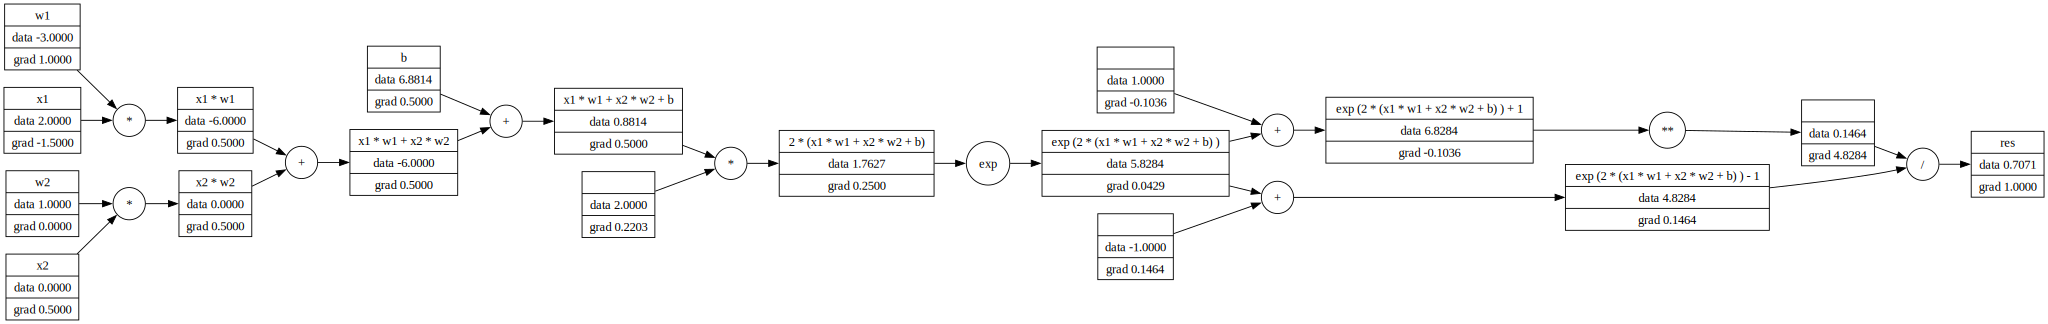

In [357]:
from micrograd.graph import draw_graph
draw_graph(res)

In [92]:
import torch
 
x1 =  torch.Tensor([2.0]).double() ; x1.requires_grad = True
x2 =  torch.Tensor([0.0]).double() ; x2.requires_grad = True

w1 =  torch.Tensor([-3.0]).double() ; w1.requires_grad = True
w2 =  torch.Tensor([1.0]).double() ; w2.requires_grad = True
b =  torch.Tensor([6.8813735870195432]).double() ; b.requires_grad = True

n = x1 * w1 + x2* w2 + b
o =  torch.tanh(n)
o.backward()
print(f"tourch o: {o.item()}")
print(f"torch x1 grad: {x1.grad.item()}")
print(f"torch x2 grad: {x2.grad.item()}")
print(f"torch w1 grad: {w1.grad.item()}")
print(f"torch w2 grad: {w2.grad.item()}")


tourch o: 0.7071066904050358
torch x1 grad: -1.5000003851533106
torch x2 grad: 0.5000001283844369
torch w1 grad: 1.0000002567688737
torch w2 grad: 0.0


In [360]:
from micrograd.neural import  MLP
xs = [ [2.0, 3.0, -1.0], [3.0, -1.0, 0.5], [0.5, 1.0, 1.0],[1.0, 1.0, -1.0]]
ys = [1.0, -1.0, -1.0, 1.0]

n = MLP(3,[4,4,1])

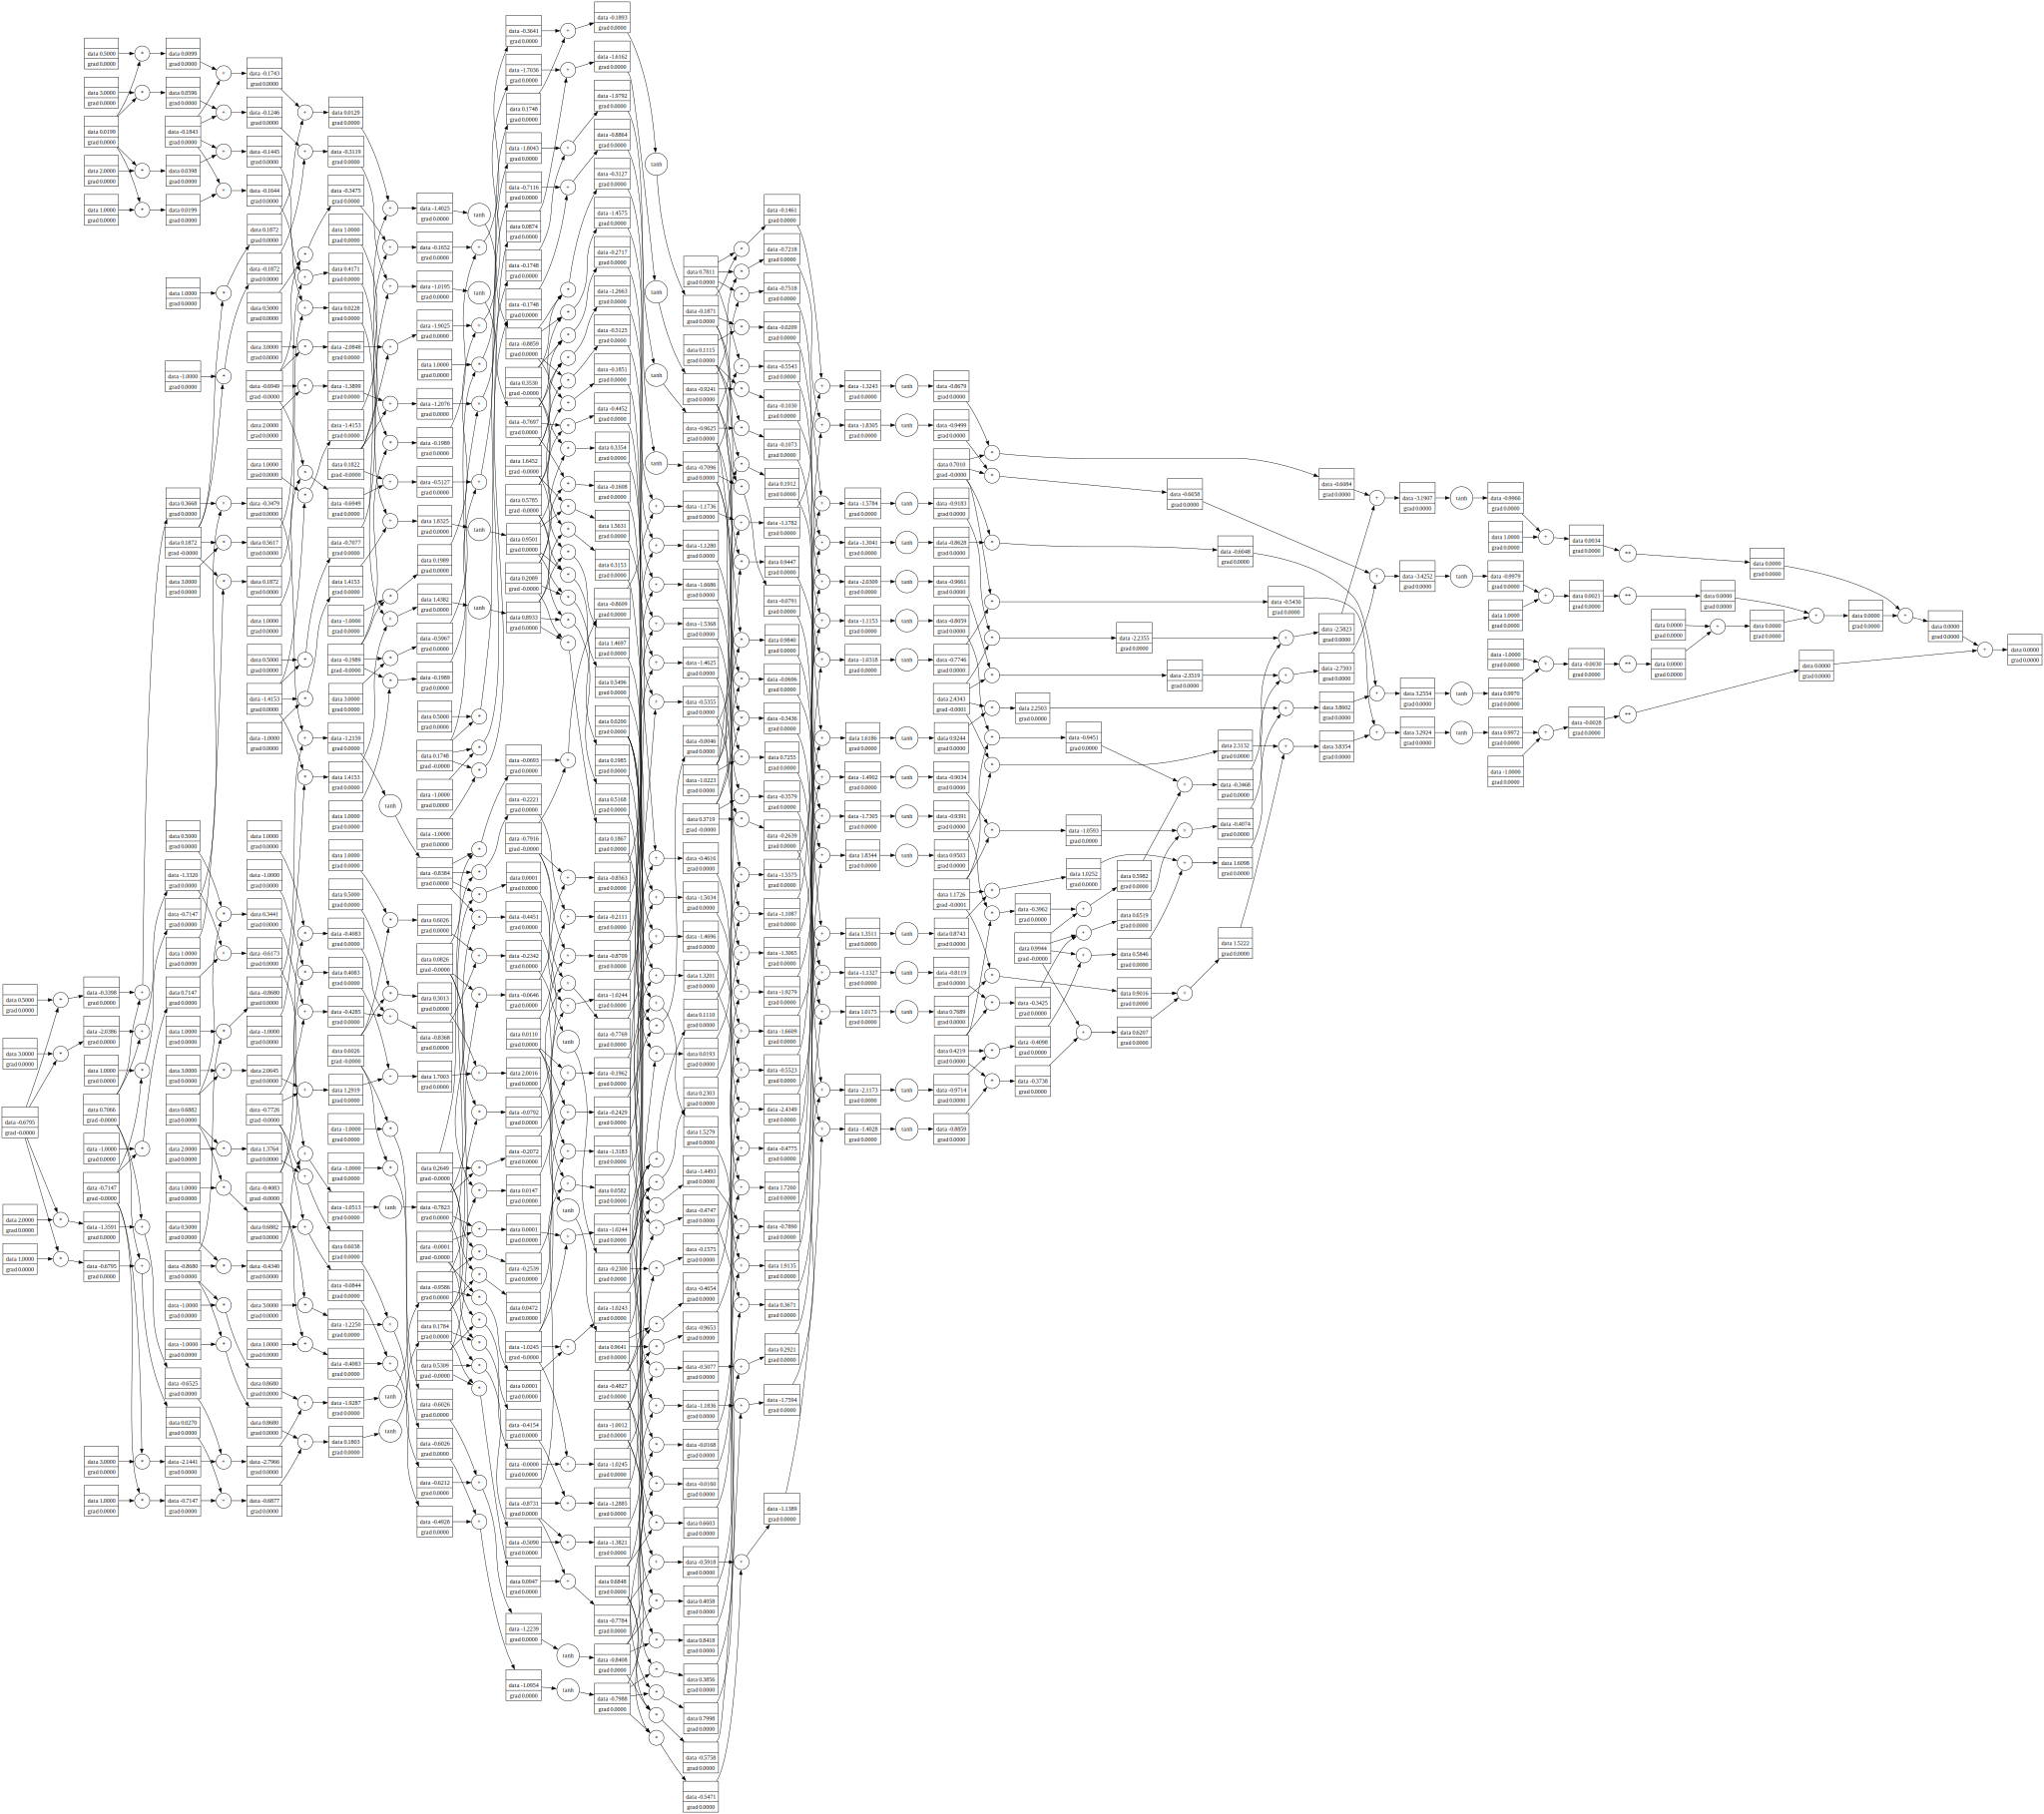

In [364]:
ypred = [n(x) for x in xs]
loss = sum((yout - ygt) ** 2 for ygt, yout in zip(ys, ypred))
draw_graph(loss)

In [362]:
for k in range(10000):

    # forward pass
    ypred = [n(x) for x in xs]
    loss = sum((yout - ygt) ** 2 for ygt, yout in zip(ys, ypred))

    # backward pass
    for param in n.parameters():
        param.grad = 0.0

    loss.backward()
    
    # update
    for p in n.parameters():
        p.data -= 0.1 * p.grad

    print(k, f"loss: {loss.data:.8f}")


0 loss: 6.14779118
1 loss: 2.95260098
2 loss: 1.56142338
3 loss: 0.83977906
4 loss: 0.59678968
5 loss: 0.29924721
6 loss: 0.16552734
7 loss: 0.13083121
8 loss: 0.10863039
9 loss: 0.09241324
10 loss: 0.08008449
11 loss: 0.07043055
12 loss: 0.06268969
13 loss: 0.05636044
14 loss: 0.05110002
15 loss: 0.04666669
16 loss: 0.04288540
17 loss: 0.03962649
18 loss: 0.03679200
19 loss: 0.03430663
20 loss: 0.03211161
21 loss: 0.03016045
22 loss: 0.02841591
23 loss: 0.02684784
24 loss: 0.02543160
25 loss: 0.02414683
26 loss: 0.02297661
27 loss: 0.02190675
28 loss: 0.02092527
29 loss: 0.02002199
30 loss: 0.01918822
31 loss: 0.01841647
32 loss: 0.01770028
33 loss: 0.01703404
34 loss: 0.01641287
35 loss: 0.01583247
36 loss: 0.01528909
37 loss: 0.01477939
38 loss: 0.01430043
39 loss: 0.01384959
40 loss: 0.01342454
41 loss: 0.01302319
42 loss: 0.01264367
43 loss: 0.01228430
44 loss: 0.01194357
45 loss: 0.01162009
46 loss: 0.01131263
47 loss: 0.01102007
48 loss: 0.01074136
49 loss: 0.01047559
50 loss: 0

In [363]:
ypred

[Value(data = 0.9970294419296115),
 Value(data = -0.9978838865374617),
 Value(data = -0.9966200543683),
 Value(data = 0.9972413883372034)]